In [16]:
# Importing all the necessary libaries that will be used through the project

import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import geopandas

In [17]:
state = geopandas.read_file(
    "../ne_110m_admin_1_states_provinces/ne_110m_admin_1_states_provinces.shp"
)
state.head()

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry
0,Admin-1 scale rank,2,USA-3514,3514,US-MN,http://en.wikipedia.org/wiki/Minnesota,US,1,Minnesota,MN|Minn.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-89.95766 47.28691, -90.13175 47.292..."
1,Admin-1 scale rank,2,USA-3515,3515,US-MT,http://en.wikipedia.org/wiki/Montana,US,1,Montana,MT|Mont.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -113.0595 49.00..."
2,Admin-1 scale rank,2,USA-3516,3516,US-ND,http://en.wikipedia.org/wiki/North_Dakota,US,1,North Dakota,ND|N.D.,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-97.22894 49.00089, -97.21414 48.902..."
3,Admin-1 scale rank,2,USA-3517,3517,US-HI,http://en.wikipedia.org/wiki/Hawaii,US,8,Hawaii,HI|Hawaii,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-155.93665 19.05939, -155.9080..."
4,Admin-1 scale rank,2,USA-3518,3518,US-ID,http://en.wikipedia.org/wiki/Idaho,US,1,Idaho,ID|Idaho,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-116.04823 49.00037, -115.9678 47.95..."


In [18]:
crime = pd.read_csv("../us_statewide_crime.csv")
crime.head()

,State,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan
0,Alabama,486,7.4,14.7,77.5,20.4,26.0,4.6,70.2
1,Alaska,567,4.3,8.4,90.4,28.1,23.2,6.6,41.6
2,Arizona,532,7.0,13.5,85.1,24.6,23.5,3.9,87.9
3,Arkansas,445,6.3,15.8,81.7,18.4,24.7,4.4,49.0
4,California,622,6.1,14.0,81.2,27.5,21.8,4.9,96.7


In [19]:
# Read in the 1980 and 2021 data to compare air quality in lockdown and before lockdown

oldAir_df = pd.read_csv("daily_aqi_data/daily_aqi_by_county_1980.csv")
newAir_df = pd.read_csv("daily_aqi_data/daily_aqi_by_county_2024.csv")

In [20]:
# Group by "State Name" and calculate the mean AQI for oldAir_df
oldAir_mean_aqi = oldAir_df.groupby("State Name")["AQI"].mean().reset_index()

# Group by "State Name" and calculate the mean AQI for newAir_df
newAir_mean_aqi = newAir_df.groupby("State Name")["AQI"].mean().reset_index()


# Display the results
print(oldAir_mean_aqi)
print(newAir_mean_aqi)

              State Name        AQI
0                Alabama  58.110709
1                 Alaska  43.505068
2                Arizona  61.094855
3               Arkansas  52.882514
4             California  67.895469
5               Colorado  49.023008
6            Connecticut  86.957475
7               Delaware  64.651899
8   District Of Columbia  67.355191
9                Florida  46.218150
10               Georgia  48.305060
11                Hawaii  16.622951
12                 Idaho  61.707650
13              Illinois  45.087070
14               Indiana  39.363840
15                  Iowa  45.400639
16                Kansas  41.581481
17              Kentucky  47.758975
18             Louisiana  41.807107
19                 Maine  37.086957
20              Maryland  60.957844
21         Massachusetts  54.156695
22              Michigan  45.043996
23             Minnesota  48.602254
24           Mississippi  50.725709
25              Missouri  60.435950
26               Montana  41

In [21]:
aqi_crime_one = pd.merge(
    crime, oldAir_mean_aqi, left_on="State", right_on="State Name", how="outer"
)
aqi_crime_two = pd.merge(
    crime, newAir_mean_aqi, left_on="State", right_on="State Name", how="outer"
)

In [22]:
aqi_crime_two.head(5)

,State,Violent_Crime,Murder_Rate,Poverty,High_School,College,Single_Parent,Unemployed,Metropolitan,State Name,AQI
0,Alabama,486.0,7.4,14.7,77.5,20.4,26.0,4.6,70.2,Alabama,36.948757
1,Alaska,567.0,4.3,8.4,90.4,28.1,23.2,6.6,41.6,Alaska,39.692157
2,Arizona,532.0,7.0,13.5,85.1,24.6,23.5,3.9,87.9,Arizona,45.279456
3,Arkansas,445.0,6.3,15.8,81.7,18.4,24.7,4.4,49.0,Arkansas,42.311877
4,California,622.0,6.1,14.0,81.2,27.5,21.8,4.9,96.7,California,45.828512


In [23]:
# Merge the state geodataset with the old AQI dataset
full_old = pd.merge(
    state, oldAir_mean_aqi, left_on="name", right_on="State Name", how="outer"
)

# Merge the state geodataset with the new AQI dataset
full_new = pd.merge(
    state, newAir_mean_aqi, left_on="name", right_on="State Name", how="outer"
)

In [24]:
full_old.head(5)

,featurecla,scalerank,adm1_code,diss_me,iso_3166_2,wikipedia,iso_a2,adm0_sr,name,name_alt,...,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,FCLASS_TLC,geometry,State Name,AQI
0,Admin-1 scale rank,2.0,USA-3541,3541.0,US-AL,http://en.wikipedia.org/wiki/Alabama,US,5.0,Alabama,AL|Ala.,...,None,None,None,None,None,None,None,"POLYGON ((-88.16696 34.99967, -86.90968 34.999...",Alabama,58.110709
1,Admin-1 scale rank,2.0,USA-3563,3563.0,US-AK,http://en.wikipedia.org/wiki/Alaska,US,6.0,Alaska,AK|Alaska,...,None,None,None,None,None,None,None,"MULTIPOLYGON (((-153.22873 57.96897, -152.5647...",Alaska,43.505068
2,Admin-1 scale rank,2.0,USA-3520,3520.0,US-AZ,http://en.wikipedia.org/wiki/Arizona,US,1.0,Arizona,AZ|Ariz.,...,None,None,None,None,None,None,None,"POLYGON ((-109.04522 36.99991, -109.04367 31.3...",Arizona,61.094855
3,Admin-1 scale rank,2.0,USA-3528,3528.0,US-AR,http://en.wikipedia.org/wiki/Arkansas,US,1.0,Arkansas,AR|Ark.,...,None,None,None,None,None,None,None,"POLYGON ((-89.66292 36.02307, -89.67351 35.94,...",Arkansas,52.882514
4,Admin-1 scale rank,2.0,USA-3521,3521.0,US-CA,http://en.wikipedia.org/wiki/California,US,8.0,California,CA|Calif.,...,None,None,None,None,None,None,None,"POLYGON ((-114.64222 35.05311, -114.62212 34.9...",California,67.895469


<Axes: >

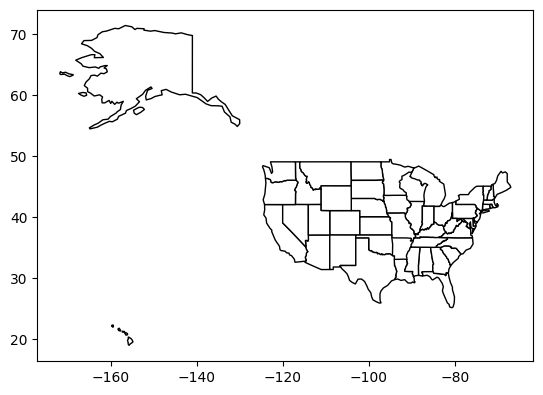

In [25]:
full_lower = full_old.drop([3, 50])
full_lower.plot(color="white", edgecolor="black")

In [26]:
# import folium
# m = full_lower.explore(
#     column="AQI",
#     legend=True,  # show legend
#     tooltip='State',  # hide tooltip
#     name="air quality",  # name of the layer in the map
# )
# m = full_lower.explore(
#     column="Unemployed",
#     legend=True,  # show legend
#     tooltip='State',  # hide tooltip
#     popup=["Violent_Crime", 'Murder_Rate','Poverty','High_School', 'College',
#           'Single_Parent', 'Metropolitan'],  # show popup (on-click)
#     name="crime",  # name of the layer in the map
# )

# #folium.TileLayer("CartoDB positron", show=False).add_to(m)
# folium.LayerControl().add_to(m)

# title_html = '''
#              <h3 align="center" style="font-size:16px"><b>The choropleth map of US unemployment rate</b></h3>
#              '''
# m.get_root().html.add_child(folium.Element(title_html))


# m  # show map

In [ ]:
# Rename columns for convenience
full_old = full_old.rename(columns={"State Name": "State", "AQI": "AQI"})
full_new = full_new.rename(columns={"State Name": "State", "AQI": "AQI"})

# Verify data structure
print(full_old[["State", "AQI"]].head())

        State        AQI
0     Alabama  58.110709
1      Alaska  43.505068
2     Arizona  61.094855
3    Arkansas  52.882514
4  California  67.895469
Empty GeoDataFrame
Columns: [featurecla, scalerank, adm1_code, diss_me, iso_3166_2, wikipedia, iso_a2, adm0_sr, name, name_alt, name_local, type, type_en, code_local, code_hasc, note, hasc_maybe, region, region_cod, provnum_ne, gadm_level, check_me, datarank, abbrev, postal, area_sqkm, sameascity, labelrank, name_len, mapcolor9, mapcolor13, fips, fips_alt, woe_id, woe_label, woe_name, latitude, longitude, sov_a3, adm0_a3, adm0_label, admin, geonunit, gu_a3, gn_id, gn_name, gns_id, gns_name, gn_level, gn_region, gn_a1_code, region_sub, sub_code, gns_level, gns_lang, gns_adm1, gns_region, min_label, max_label, min_zoom, wikidataid, name_ar, name_bn, name_de, name_en, name_es, name_fr, name_el, name_hi, name_hu, name_id, name_it, name_ja, name_ko, name_nl, name_pl, name_pt, name_ru, name_sv, name_tr, name_vi, name_zh, ne_id, name_he, name_uk

In [28]:
import folium
from folium import Choropleth

# Filter out rows with missing geometries
full_old = full_old[full_old.geometry.notnull()]

full_old_gdf = geopandas.GeoDataFrame(full_old, geometry=full_old.geometry)
if full_old_gdf.crs != "EPSG:4326":
    full_old_gdf = full_old_gdf.to_crs("EPSG:4326")

m = folium.Map(location=[37.8, -96.9], zoom_start=4)
Choropleth(
    geo_data=full_old_gdf,
    data=full_old_gdf,
    columns=["State", "AQI"],
    key_on="feature.properties.name",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average AQI (1980)",
    threshold_scale=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
    missing_kwds={
        "color": "lightgrey",
        "edgecolor": "red",
        "hatch": "///",
        "label": "Missing values",
    },
).add_to(m)

folium.GeoJson(
    full_old_gdf,
    style_function=lambda x: {
        "fillColor": "transparent",
        "color": "black",
        "weight": 0.5,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["State", "AQI"], aliases=["State:", "Average AQI:"], localize=True
    ),
).add_to(m)

m.save("aqi_choropleth_1980.html")
m

In [29]:
import folium
from folium import Choropleth

# Filter out rows with missing geometries
full_new = full_new[full_new.geometry.notnull()]

full_new_gdf = geopandas.GeoDataFrame(full_new, geometry=full_new.geometry)
if full_new_gdf.crs != "EPSG:4326":
    full_new_gdf = full_new_gdf.to_crs("EPSG:4326")

m = folium.Map(location=[37.8, -96.9], zoom_start=4)
Choropleth(
    geo_data=full_new_gdf,
    data=full_new_gdf,
    columns=["State", "AQI"],
    key_on="feature.properties.name",
    fill_color="Reds",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Average AQI (2024)",
    threshold_scale=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
).add_to(m)

folium.GeoJson(
    full_new_gdf,
    style_function=lambda x: {
        "fillColor": "transparent",
        "color": "black",
        "weight": 0.5,
    },
    tooltip=folium.GeoJsonTooltip(
        fields=["State", "AQI"], aliases=["State:", "Average AQI:"], localize=True
    ),
).add_to(m)

m.save("aqi_choropleth_2024.html")
m